#Time Pattern Cohesion Score (TPCS)

is a metric to assess how well time-dependent patterns within a time series signal remain connected over time, with an emphasis on recency.



-----
This notebook contains experimeenting and demo process of creating a custom cleanless metric for evaluating demand data signals.

1. Designating relevant features (10 fundemantal attributes currently)
2. Writing functions for extracting these features
3. Combining similar featues together to compansate each other's weakness
4. Creating 4 features out of attributes:

5. Using weights to manipulate metrics


Extracted **attributes** are like this :

*   total sample size (**n_of_samples**)
*   Longest Consecutive Subsequence of months  (**LCS_m**)
*   Longest Consecutive Subsequence of months with 1 gap month (**LCS_m_1g**)
*   Longest Consecutive Subsequence of months with 2 gap month (**LCS_m_1g**)

*   Longest Consecutive Subsequence of months from last timestamp (**LCS_m_from_last**)
*   Longest Consecutive Subsequence of months from last timestamp  with 1 gap month (**LCS_m_from_last_1g**)
*   Longest Consecutive Subsequence of months from last timestamp  with 2 gap month  (**LCS_m_from_last_2g**)
*   Longest Consecutive Subsequence of months from end time (**LCS_m_from_end**)
*   Longest Consecutive Subsequence of months from end time  with 1 gap month  (**LCS_m_from_end_1g**)



Current feature categories:

**Consistency**: shows if data collection is consistent with respect to  start and end time of data crawling  , (from  2020-09 to current time)

**Intra Consistency**: shows if data collection was consistent with respect to signal’s own start and end time.

**Recent Contiguity:** shows how contiguous recent data is

**Contiguity**: shows how  contiguous data is. 5 is fully contiguous which means all existed values are sequential

















In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
from pandas.io.formats.format import return_docstring

#Problem Statement:

how to quantitively distinguish "cleanliness" of these dummy signal values?


<Figure size 1500x300 with 0 Axes>

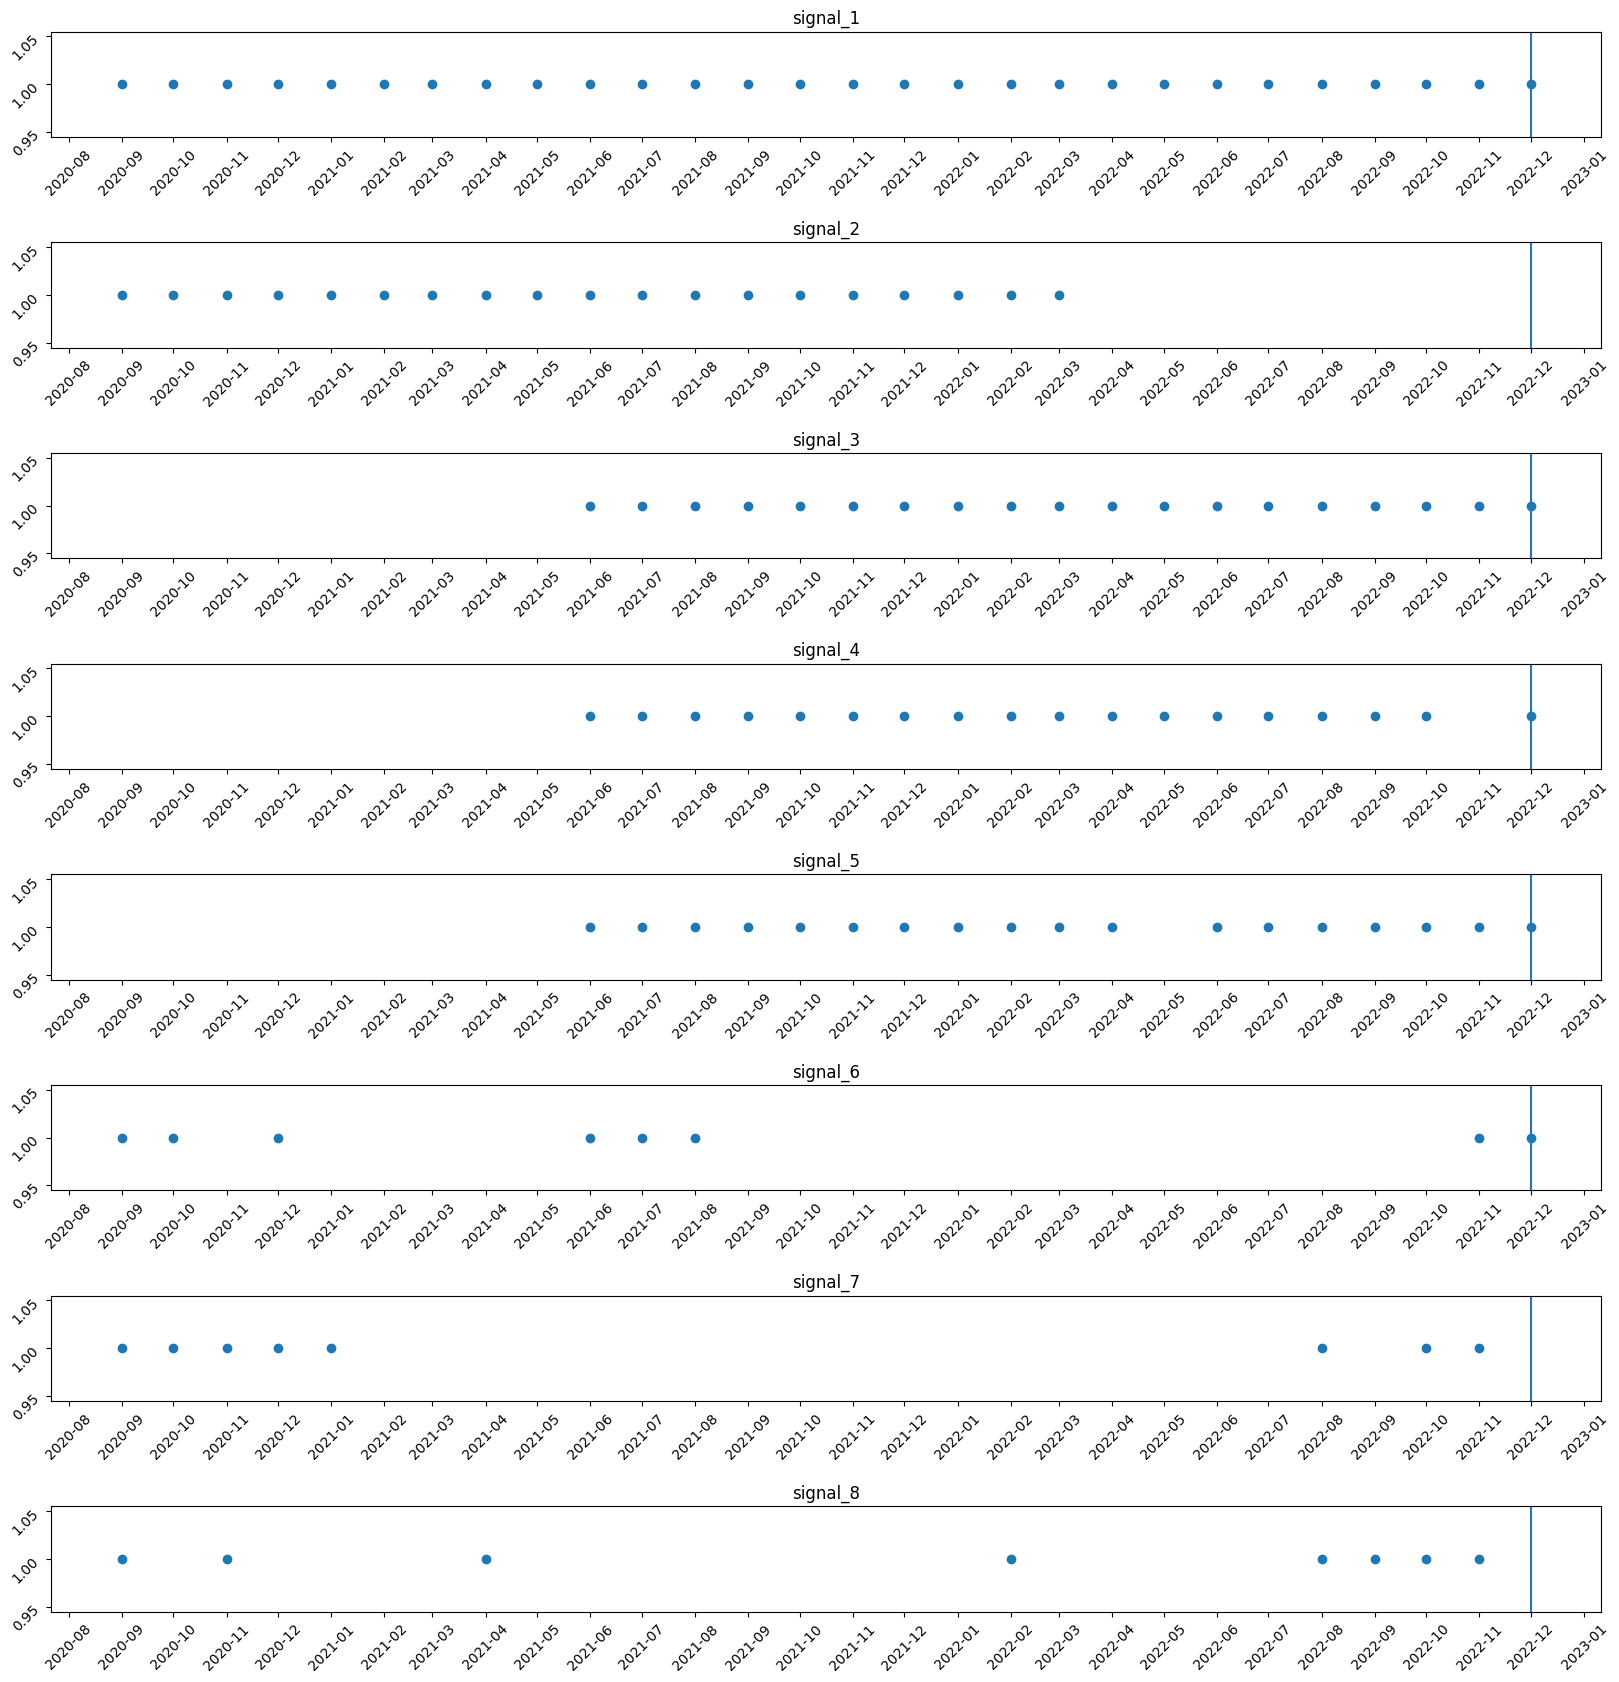

In [2]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]
t2 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021" , "11-2021", "12-2021" , "01-2022", "02-2022", "03-2022" ]
t3= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022", "12-2022" ]
t4= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022",  "12-2022" ]
t5= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","06-2022", "07-2022", "08-2022", "09-2022","10-2022", "11-2022",  "12-2022" ]
t6 = ["09-2020", "10-2020", "12-2020", "06-2021", "07-2021", "08-2021", "11-2022","12-2022"]
t7 = ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "08-2022", "10-2022", "11-2022"]
t8 = ["09-2020", "11-2020", "04-2021", "02-2022", "08-2022", "09-2022", "10-2022", "11-2022"]



timestamps= [t1,t2,t3,t4,t5, t6, t7,t8]
names=["signal_1","signal_2","signal_3","signal_4","signal_5","signal_6","signal_7","signal_8"]
all=[]
for i in range(len(timestamps)):
  data = np.ones(len(timestamps[i]))
  timestamps[i]=pd.to_datetime(timestamps[i] )
  all.append((timestamps[i],data) )




plt.figure(figsize=(15,3))

f, axarr = plt.subplots(8,1,figsize=(20, 20), sharex=True)

plt.subplots_adjust(top=0.9,hspace=1)

for i in range(len(all)):
  axarr[i].scatter(all[i][0], all[i][1])
  axarr[i].tick_params(labelrotation=45)
  axarr[i].xaxis.set_major_locator(mdates.MonthLocator())
  axarr[i].axvline(dt.datetime(2022, 12, 1))
  axarr[i].title.set_text(names[i])
  axarr[i].tick_params(labelbottom=True)






# Helper Functions

In [3]:
def make_timestamp_list_to_ones_signal(timestamp_list):
  data = np.ones(len(timestamp_list))
  timestamp_list=pd.to_datetime(timestamp_list )
  return timestamp_list, data

In [4]:
import numpy as np
import pandas as pd



class Sequenciality:
  def __init__(self):
     pass

  def find_LongestConseqSubseq(self,arr):
      # arr= self.lon
      n=len(arr)
      ans = 0
      count = 0
      arr.sort()
      v = []

      v.append(arr[0])

      for i in range(1, n):
          if (arr[i] != arr[i - 1]):
              v.append(arr[i])

      # Find the maximum length
      # by traversing the array
      for i in range(len(v)):

        # Check if the current element is
        # equal to previous element +1
        if (i > 0 and v[i] == v[i - 1] + 1):
          count += 1

        # Reset the count
        else:
          count = 1


        ans = max(ans, count)

      return ans


  def find_LongestConseqSubseq_1gap(self,arr):
    # arr= self.lon
    _ , locs=self.find_sequential_elements_with_difference_of_2(arr)

    if len(locs)>0:

      results=[]
      for i in range(len(arr)):


          temp=arr.copy()
          if i in locs:

            temp.insert(i+1,temp[i]+1 )

            #  r=calculate_LCS_m(temp)
            r=self.find_LongestConseqSubseq(temp)
            results.append(r)

      return max(results)

    else:

      r=self.find_LongestConseqSubseq(arr)
      return r


  def find_LongestConseqSubseq_2gap(self,arr):

    _ , locs=self.find_sequential_elements_with_difference_of_3(arr)

    if len(locs)>0:

      results=[]
      for i in range(len(arr)):
          # print("i:",i)

          temp=arr.copy()
          if i in locs:
            # print("i in locs")
            # print(temp)
            temp.insert(i+1,temp[i]+1 )
            temp.insert(i+2,temp[i]+2 )
            # print(temp)
            #  r=calculate_LCS_m(temp)
            r=self.find_LongestConseqSubseq(temp)
            results.append(r)

      return max(results)

    else:

        r= self.find_LongestConseqSubseq_1gap(arr)
    return r

  def find_LongestConseqSubseq_from_end(self, arr):
      # arr=self.lon
      rg=range(len(arr) - 1 , -1, -1)
      current_length = 1
      for i in rg:
        if arr[i] - 1 == arr[i - 1]:
              current_length += 1
        else:
          break
      return current_length


  def find_LongestConseqSubseq_from_end_with_1_gap(self,arr):
      rg=range(len(arr) - 1 , -1, -1)
      current_length = 1
      one_time_flag=False
      for i in rg:
        if arr[i] - 1 == arr[i - 1]:
              current_length += 1
        elif arr[i] - 2 == arr[i - 1]:
          if one_time_flag==False:
            current_length += 1
            one_time_flag=True
        else:
          break
      return current_length



  def find_LongestConseqSubseq_from_end_with_2_gap(self,arr):
      # arr=self.lon
      rg=range(len(arr) - 1 , -1, -1)
      current_length = 1
      two_time_flag=0
      for i in rg:
        if arr[i] - 1 == arr[i - 1]:
              current_length += 1

        elif arr[i] - 2 == arr[i - 1]:
            if not two_time_flag  >2:
              current_length += 1
              two_time_flag+= 1
              if two_time_flag==2:
                  two_time_flag+= 1
        elif arr[i] - 3 == arr[i - 1]:
            if two_time_flag==0:
              current_length += 1
              two_time_flag=3

      return current_length


  def find_sequential_elements_with_difference_of_2(self,sequence):
    sequential_pairs = []
    locs = []
    for i in range(len(sequence) - 1):
        if sequence[i + 1] - sequence[i] == 2:
            sequential_pairs.append((sequence[i], sequence[i + 1]))
            locs.append(i)
    return sequential_pairs, locs


  def find_sequential_elements_with_difference_of_3(self,sequence):
      sequential_pairs = []
      locs = []
      for i in range(len(sequence) - 1):
          if sequence[i + 1] - sequence[i] == 3:
              sequential_pairs.append((sequence[i], sequence[i + 1]))
              locs.append(i)
      return sequential_pairs, locs


## Tests

In [5]:
test1= [1,2,3,4,5,6]
test2= [1,2,4,6]
test3= [1,2,5,6]
test4= [1,2,5,6,7,8,9]
test5= [1,2,5,6,7,9]
test6= [1,2,5,6,9]

tests=[test1, test2, test3, test4, test5, test6]

for t in tests:

  seq=Sequenciality()

  print( seq.find_LongestConseqSubseq(t) , end="-")
  print( seq.find_LongestConseqSubseq_1gap(t) ,end="-")
  print( seq.find_LongestConseqSubseq_2gap(t),end="-")
  print( seq.find_LongestConseqSubseq_from_end(t) ,end="-")
  print( seq.find_LongestConseqSubseq_from_end_with_1_gap(t), end="-")
  print( seq.find_LongestConseqSubseq_from_end_with_2_gap(t), end="")

  print(" ")

6-6-6-6-6-6 
2-4-4-1-3-4 
2-2-6-2-2-4 
5-5-9-5-5-7 
3-5-7-1-4-5 
2-2-6-1-1-4 


# Main Module

In [19]:

#Time_Pattern_Cohesion_Score
class TPCS:
  def __init__(self, list_of_timestamps, MAX_LEN_MONTHS, END_OF_TIME, debug=False):
    self.lot= list_of_timestamps
    self.EOT=END_OF_TIME
    self.MAX_LEN_MONTHS=MAX_LEN_MONTHS
    self.seq=Sequenciality()
    self.debug=debug

    if type(self.EOT)==str:
        pass
        #todo convert to pn date time

    if type(self.lot)==str:
       pass
       #todo convert to pn date time

    self.lot_mdr=self.make_monthdistance_representation(self.lot)
    self.EOT_mdr=self.make_monthdistance_representation([self.EOT])[0]

    if self.debug:

      print(self.lot_mdr)
      print(self.EOT_mdr)


  def convert_date_to_montly_distance_to_2000(self,d):
     origin=pd.to_datetime("2000")
     r=self.find_diff_in_months(d,origin )
     return r




  def make_monthdistance_representation(self, list_of_timestamps):

        monthdistance_representation=[]
        for e in list_of_timestamps:
            r=self.convert_date_to_montly_distance_to_2000(e)
            monthdistance_representation.append(r)
        return monthdistance_representation


  # def find_diff_in_months( a, b):
  #   # Compute year and month differences
  #   year_diff = a.year - b.year
  #   month_diff = a.month - b.month
    
  #   total_months = year_diff * 12 + month_diff
    
  #   if a.day < b.day:
  #       total_months -= 1

  #   # Debugging information
  #   # if self.debug:
  #   #     print("a:", a, "b:", b)
  #   #     print("year_diff:", year_diff, "month_diff:", month_diff)
  #   #     print("total_months:", total_months)
        
  #   return total_months


   def find_diff_in_months(self, a, b):
    # Compute year and month differences
    year_diff = a.year - b.year
    month_diff = a.month - b.month
    
    total_months = year_diff * 12 + month_diff
    
    if a.day < b.day:
        total_months -= 1

    
    if self.debug:
        print("a:", a, "b:", b)
        print("year_diff:", year_diff, "month_diff:", month_diff)
        print("total_months:", total_months)
        
    return total_months


  def calculate_LCS_m(self):
    return self.seq.find_LongestConseqSubseq( self.lot_mdr)

  def calculate_LCS_m_1n(self):
    return self.seq.find_LongestConseqSubseq_1gap( self.lot_mdr)

  def calculate_LCS_m_2n(self):
    return self.seq.find_LongestConseqSubseq_2gap( self.lot_mdr)

  def calculate_LCS_m_from_end_of_signal(self):
    return self.seq.find_LongestConseqSubseq_from_end( self.lot_mdr)

  def calculate_LCS_m_from_end_of_signal_1n(self):
    return self.seq.find_LongestConseqSubseq_from_end_with_1_gap( self.lot_mdr)

  def calculate_LCS_m_from_end_of_signal_2n(self):
    return self.seq.find_LongestConseqSubseq_from_end_with_2_gap( self.lot_mdr)

  def calculate_LCS_m_from_end_of_time(self ):
    if self.lot_mdr[-1]!=self.EOT_mdr:
        self.lot_mdr.append(self.EOT_mdr)

    r=self.seq.find_LongestConseqSubseq_from_end( self.lot_mdr)
    

    return r

  def calculate_LCS_m_from_end_of_time_1n(self ):
    if self.lot_mdr[-1]!=self.EOT_mdr:
        self.lot_mdr.append(self.EOT_mdr)
    return self.seq.find_LongestConseqSubseq_from_end_with_1_gap( self.lot_mdr)



  def calculate_features(self):

      f0=self.calculate_LCS_m()
      f1=self.calculate_LCS_m_1n()
      f2=self.calculate_LCS_m_2n()
      f3=self.calculate_LCS_m_from_end_of_signal()
      f4=self.calculate_LCS_m_from_end_of_signal_1n()
      f5=self.calculate_LCS_m_from_end_of_signal_2n()
      f6= self.calculate_LCS_m_from_end_of_time()
      f7= self.calculate_LCS_m_from_end_of_time_1n()

      contiguity_features=[f0,f1,f2]
      consistency_features=[f3,f4,f5]
      recent_contiguity_features=[f6,f7]

      if self.debug:

        print(f0,f1,f2,f3,f4,f5,f6,f7)


      return contiguity_features, recent_contiguity_features, consistency_features

  def calculate_TPCS(self,  weights=None, printing=False):

      contiguity_features,\
      recent_contiguity_features,\
      consistency_features  =self.calculate_features()

      num_of_samples=len(self.lot)

      if weights:
        pass
      else:
        weights={ "contiguity_score":1,
                  "recent_contiguity_score":1,
                  "consistency_score":1,
                  "intra_consistency_score":1

        }
      denominator=sum(weights.values())


      avg_contiguity_points=        sum(contiguity_features)/len(contiguity_features)
      avg_recent_contiguity_points= sum(recent_contiguity_features)/len(recent_contiguity_features)
      avg_consistency_points=       sum(consistency_features)/len(consistency_features)


      contiguity_score=        avg_contiguity_points/self.MAX_LEN_MONTHS* 5
      recent_contiguity_score= avg_recent_contiguity_points/self.MAX_LEN_MONTHS* 5
      consistency_score=       avg_consistency_points/self.MAX_LEN_MONTHS* 5
      intra_consistency_score= avg_consistency_points/num_of_samples* 5

      weighted_avg_all= (contiguity_score*+weights["contiguity_score"]+\
                recent_contiguity_score*weights["recent_contiguity_score"]+\
                consistency_score*weights["consistency_score"]+\
                intra_consistency_score*weights["intra_consistency_score"] ) /denominator


      if printing:
        # "longest_consecutive_subseq":
        print("--------------:")
        print("Metrics:")
        print(" ")
        print("Contiguity :",contiguity_score)
        print("Recent_contiguity:",recent_contiguity_score)
        print("cconsistency :",consistency_score)
        print("Intra consistency :",intra_consistency_score)
        print("TPCS (weighted avg of all) :",weighted_avg_all)


      return weighted_avg_all



## Tests


In [7]:

date_sample1 = "09-2020"
date_sample2 = "09-2021"
date_sample3 = ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "03-2021"]

date_sample1=pd.to_datetime(date_sample1)
date_sample2=pd.to_datetime(date_sample2)
date_sample3=pd.to_datetime(date_sample3)

MAX_LEN_MONTHS=28
END_OF_TIME= pd.to_datetime("12-2022")


tpcs=TPCS(date_sample3, MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)

tpcs.calculate_TPCS()


--------------:
Metrics:
 
Contiguity : 1.130952380952381
Recent_contiguity: 0.17857142857142855
cconsistency : 0.7738095238095237
Intra consistency : 3.611111111111111
TPCS (weighted avg of all) : 1.4236111111111112


1.4236111111111112

In [5]:
# import pandas as pd
# def find_diff_in_months( a, b):
#     # Compute year and month differences
#     year_diff = a.year - b.year
#     month_diff = a.month - b.month
    
#     total_months = year_diff * 12 + month_diff
    
#     if a.day < b.day:
#         total_months -= 1

#     # Debugging information
#     # if self.debug:
#     #     print("a:", a, "b:", b)
#     #     print("year_diff:", year_diff, "month_diff:", month_diff)
#     #     print("total_months:", total_months)
        
#     return total_months





# origin=pd.to_datetime("01-2020")
# t=pd.to_datetime("03-2023")

# find_diff_in_months( t, origin)


38

# Testing Metric with Samples



## Macros

Assumption 1: In total there can be max 28 months

Assumption 2: Last month of data belongs to (2022, 12, 1)

In [8]:
MAX_LEN_MONTHS=28
END_OF_TIME= dt.datetime(2022, 12, 1)


weights={ "contiguity_score":0.5,
                "recent_contiguity_score":3,
                "consistency_score":0.8,
                "intra_consistency_score":1

      }

##Example 1 [Perfect Score]

<Figure size 1500x300 with 0 Axes>

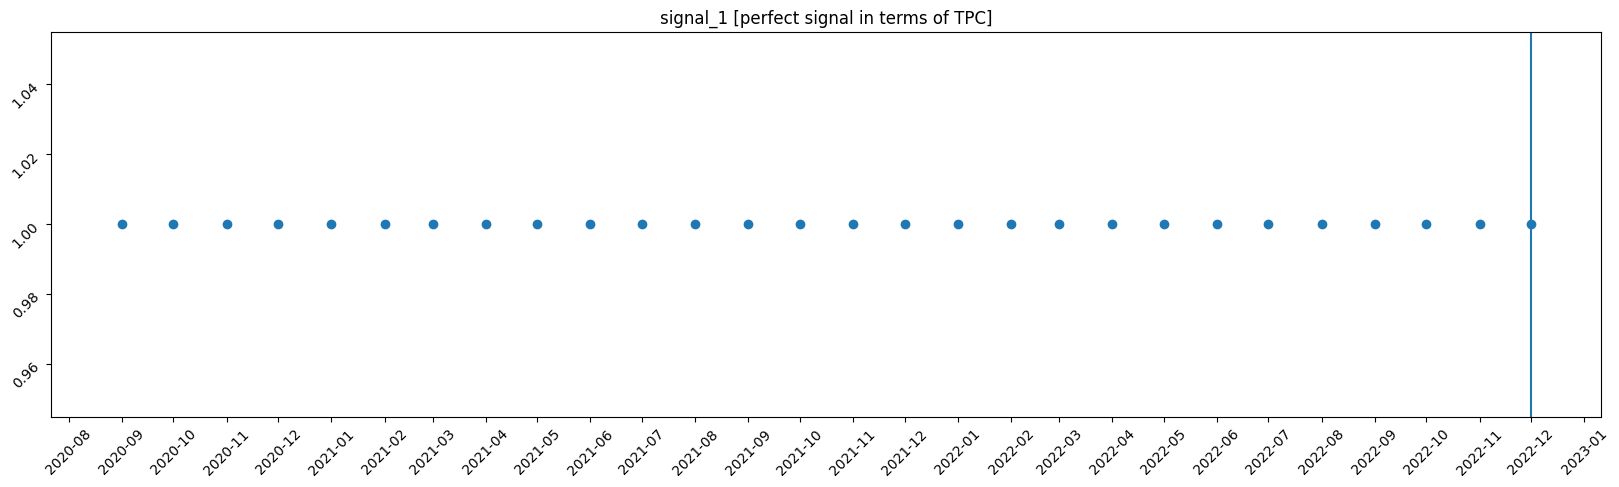

In [9]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]

timestamp_list, data=make_timestamp_list_to_ones_signal(t1)

plt.figure(figsize=(15,3))

f, axarr = plt.subplots(1,1,figsize=(20, 5), sharex=True)

for i in range(1):
  axarr.scatter(timestamp_list, data)
  axarr.tick_params(labelrotation=45)
  axarr.xaxis.set_major_locator(mdates.MonthLocator())
  axarr.title.set_text("signal_1 [perfect signal in terms of TPC]")
  axarr.axvline(dt.datetime(2022, 12, 1))
  axarr.tick_params(labelbottom=True)

In [10]:
tpcs=TPCS(timestamp_list, MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)



--------------:
Metrics:
 
Contiguity : 5.0
Recent_contiguity: 5.0
cconsistency : 5.0
Intra consistency : 5.0
TPCS (weighted avg of all) : 5.0


5.0

## Example 2

<Figure size 1500x300 with 0 Axes>

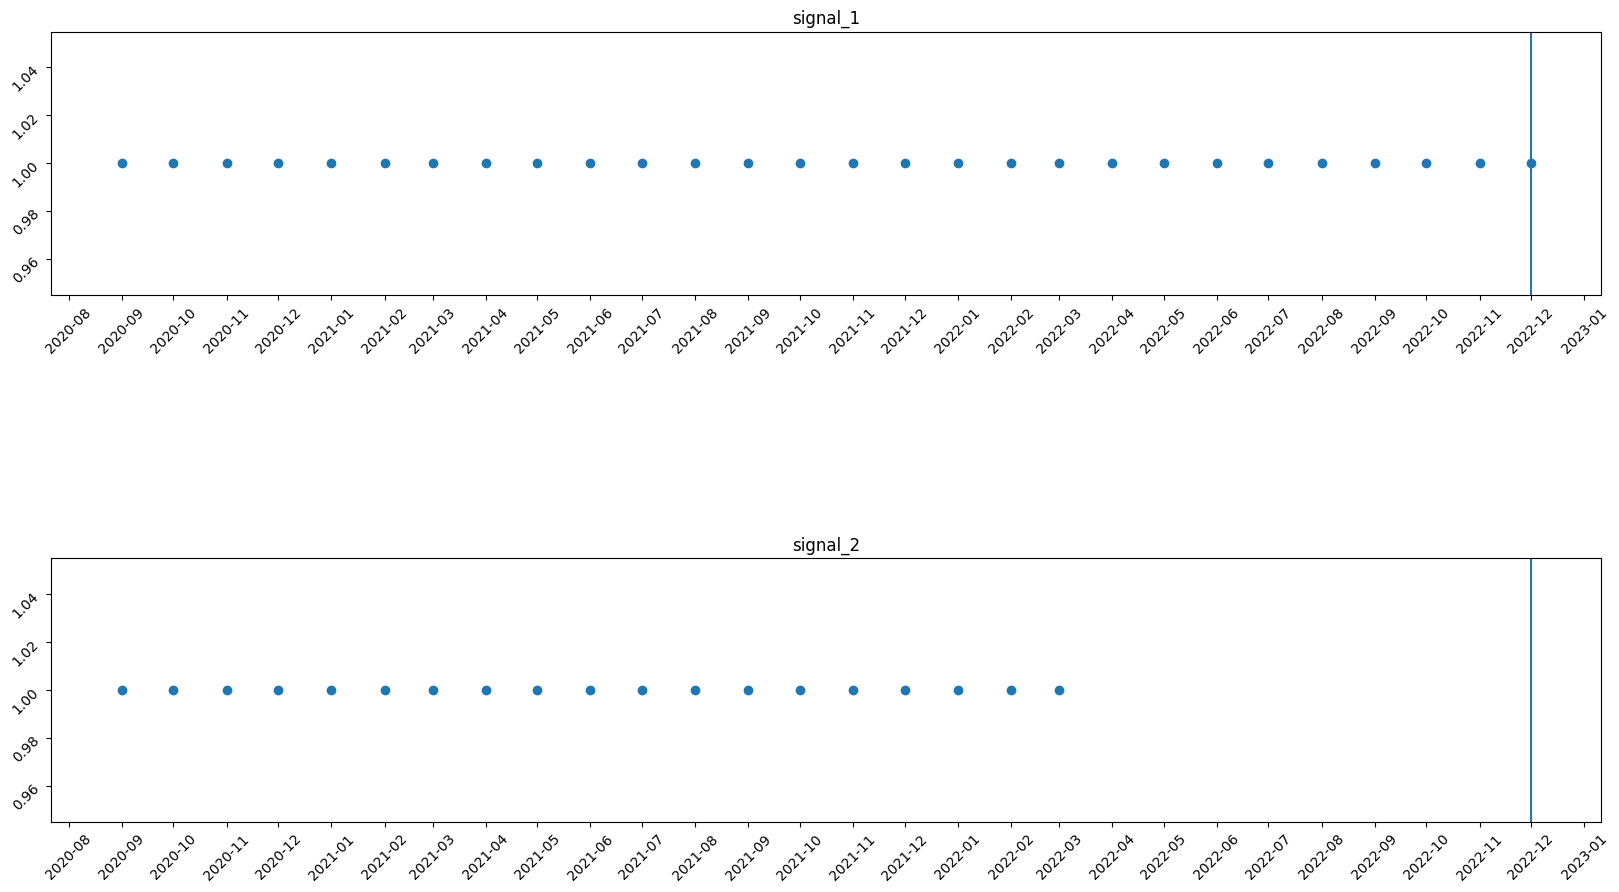

In [11]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]
t2 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021" , "11-2021", "12-2021" , "01-2022", "02-2022", "03-2022" ]



timestamps= [t1,t2]
names=["signal_1","signal_2"]
all=[]
for i in range(len(timestamps)):
  time_values, data=make_timestamp_list_to_ones_signal(timestamps[i])
  all.append((time_values,data) )


plt.figure(figsize=(15,3))


f, axarr = plt.subplots(2,1,figsize=(20, 10), sharex=True)
plt.subplots_adjust(top=0.9,hspace=1)

for i in range(len(all)):
  axarr[i].scatter(all[i][0], all[i][1])
  axarr[i].tick_params(labelrotation=45)
  axarr[i].xaxis.set_major_locator(mdates.MonthLocator())
  axarr[i].axvline(dt.datetime(2022, 12, 1))
  axarr[i].title.set_text(names[i])
  axarr[i].tick_params(labelbottom=True)

in this case we can say second signal's score should be less than the first signal
However  they are different products and maybe second one started manufactured at 6th month of 2021, in this case this signal also should have full cleanless score just like the first one. But since we dont have any information about when a pn started production, i will treat all such signals as if they are missing a data.

In [12]:
tpcs=TPCS(all[0][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

tpcs=TPCS(all[1][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)



--------------:
Metrics:
 
Contiguity : 5.0
Recent_contiguity: 5.0
cconsistency : 5.0
Intra consistency : 5.0
TPCS (weighted avg of all) : 5.0
--------------:
Metrics:
 
Contiguity : 3.3928571428571432
Recent_contiguity: 0.17857142857142855
cconsistency : 3.3928571428571432
Intra consistency : 5.0
TPCS (weighted avg of all) : 1.8766846361185987


1.8766846361185987

## Example 3

<Figure size 1500x300 with 0 Axes>

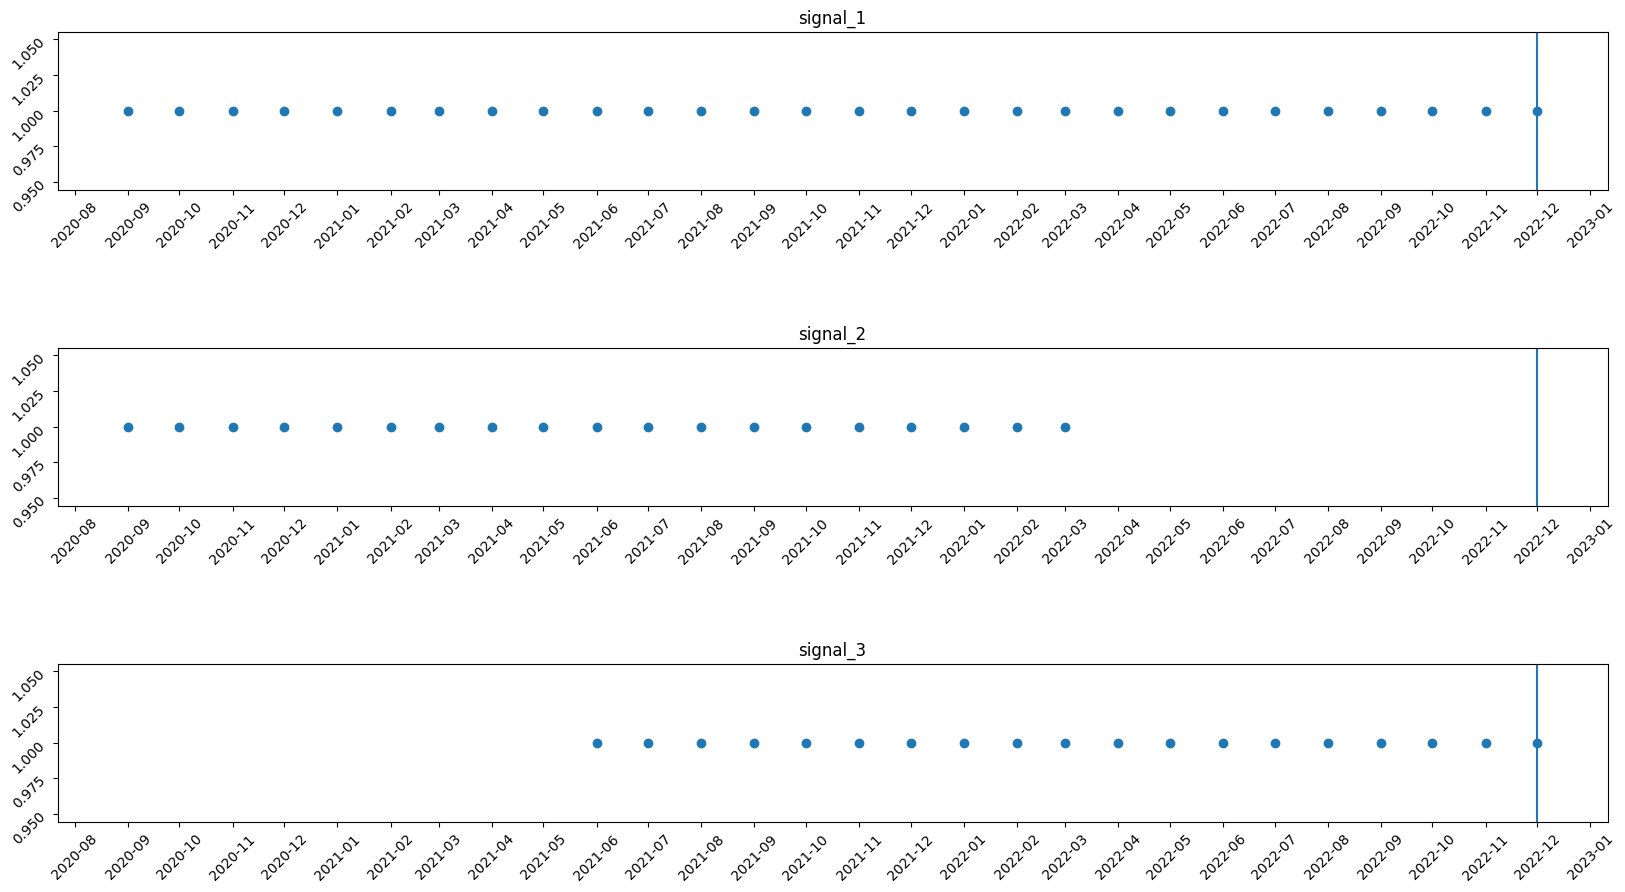

In [13]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]
t2 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021" , "11-2021", "12-2021" , "01-2022", "02-2022", "03-2022" ]
t3= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022", "12-2022" ]


timestamps= [t1,t2, t3]
names=["signal_1","signal_2", "signal_3"]

all=[]
for i in range(len(timestamps)):
  time_values, data=make_timestamp_list_to_ones_signal(timestamps[i])
  all.append((time_values,data) )


plt.figure(figsize=(15,3))

f, axarr = plt.subplots(3,1,figsize=(20, 10), sharex=True)
plt.subplots_adjust(top=0.9,hspace=1)

for i in range(len(all)):
  axarr[i].scatter(all[i][0], all[i][1])
  axarr[i].tick_params(labelrotation=45)
  axarr[i].xaxis.set_major_locator(mdates.MonthLocator())
  axarr[i].axvline(dt.datetime(2022, 12, 1))
  axarr[i].title.set_text(names[i])
  axarr[i].tick_params(labelbottom=True)







in this case we see signal 2 and signal 3 are really smilar in terms of having same number of points and if we calculate their cleanless metric with current equation their metrics will have exactly same value,

In [14]:
tpcs=TPCS(all[1][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

tpcs=TPCS(all[2][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)



--------------:
Metrics:
 
Contiguity : 3.3928571428571432
Recent_contiguity: 0.17857142857142855
cconsistency : 3.3928571428571432
Intra consistency : 5.0
TPCS (weighted avg of all) : 1.8766846361185987
--------------:
Metrics:
 
Contiguity : 3.3928571428571432
Recent_contiguity: 3.3928571428571432
cconsistency : 3.3928571428571432
Intra consistency : 5.0
TPCS (weighted avg of all) : 3.696091644204852


3.696091644204852

In [15]:

tpcs=TPCS(all[2][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

--------------:
Metrics:
 
Contiguity : 3.3928571428571432
Recent_contiguity: 3.3928571428571432
cconsistency : 3.3928571428571432
Intra consistency : 5.0
TPCS (weighted avg of all) : 3.696091644204852


3.696091644204852

but these two signal has fundemanteally different in terms of forecastability. first one has it's values at most recent months an the second one has only old values. therefore in their cleanless metric the first one must have better score compare to the second one

And this difference is caused by :
**Recent Contiguity:** shows how contiguous recent data is


## Example 4

<Figure size 1500x300 with 0 Axes>

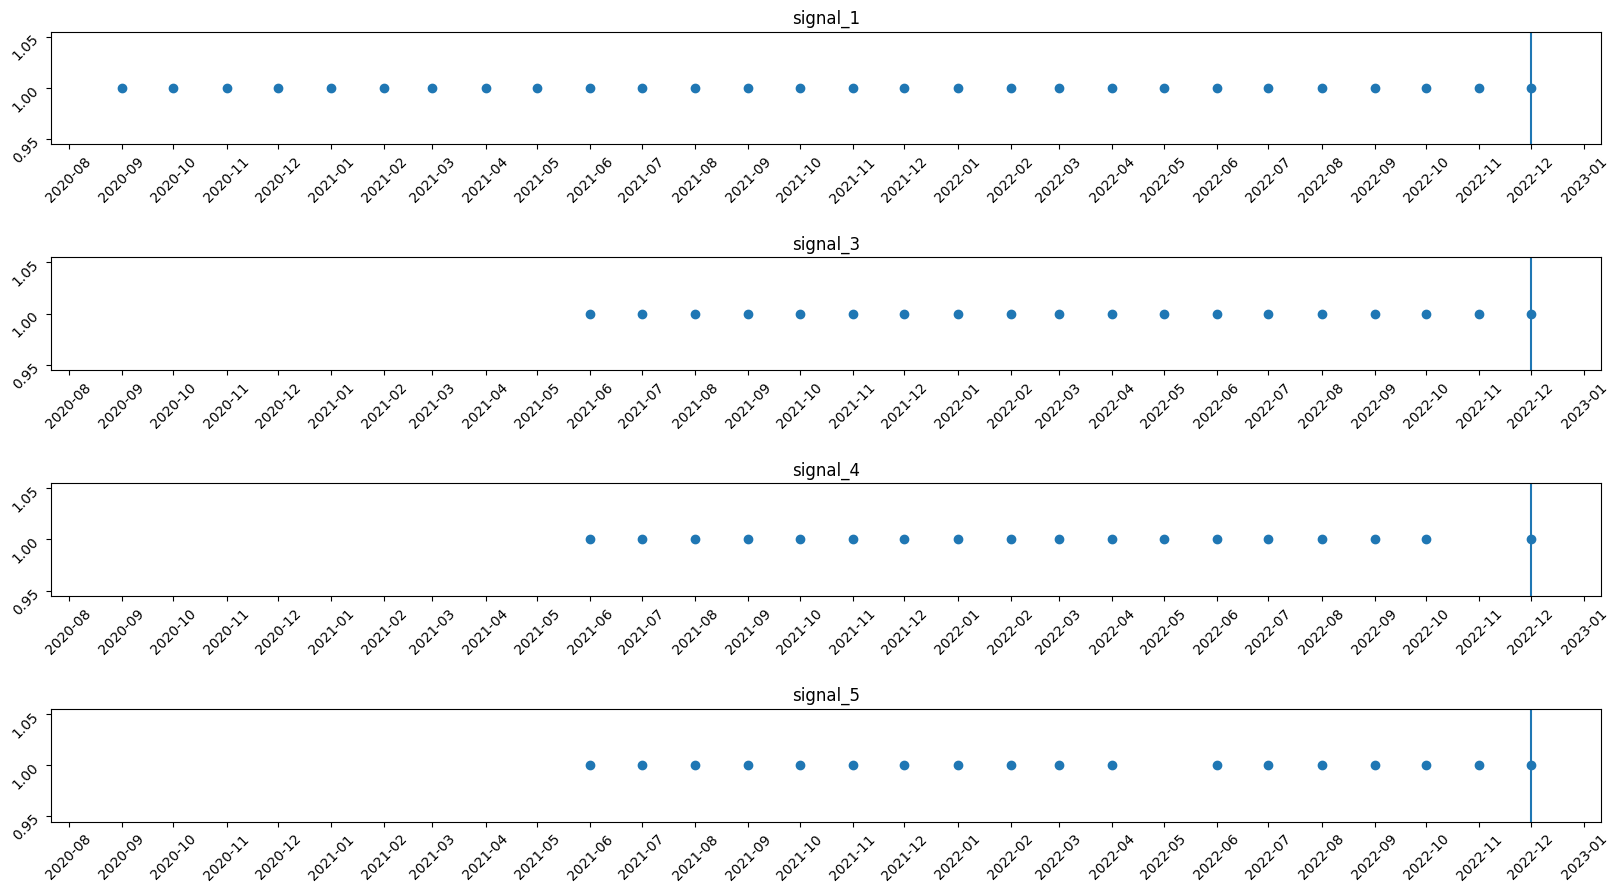

In [16]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]
t3= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022", "12-2022" ]
t4= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022",  "12-2022" ]
t5= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","06-2022", "07-2022", "08-2022", "09-2022","10-2022", "11-2022",  "12-2022" ]


timestamps= [t1,t3, t4,t5 ]
names=["signal_1","signal_3", "signal_4","signal_5"]
all=[]
for i in range(len(timestamps)):
  time_values, data=make_timestamp_list_to_ones_signal(timestamps[i])
  all.append((time_values,data) )


plt.figure(figsize=(15,3))

f, axarr = plt.subplots(4,1,figsize=(20, 10), sharex=True)
plt.subplots_adjust(top=0.9,hspace=1)

for i in range(len(all)):
  axarr[i].scatter(all[i][0], all[i][1])
  axarr[i].tick_params(labelrotation=45)
  axarr[i].xaxis.set_major_locator(mdates.MonthLocator())
  axarr[i].axvline(dt.datetime(2022, 12, 1))
  axarr[i].title.set_text(names[i])
  axarr[i].tick_params(labelbottom=True)


In [17]:
tpcs=TPCS(all[0][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

tpcs=TPCS(all[1][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

tpcs=TPCS(all[2][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

tpcs=TPCS(all[3][0], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
tpcs.calculate_TPCS(weights=weights)

--------------:
Metrics:
 
Contiguity : 5.0
Recent_contiguity: 5.0
cconsistency : 5.0
Intra consistency : 5.0
TPCS (weighted avg of all) : 5.0
--------------:
Metrics:
 
Contiguity : 3.3928571428571432
Recent_contiguity: 3.3928571428571432
cconsistency : 3.3928571428571432
Intra consistency : 5.0
TPCS (weighted avg of all) : 3.696091644204852
--------------:
Metrics:
 
Contiguity : 3.2738095238095237
Recent_contiguity: 1.6964285714285716
cconsistency : 2.2023809523809526
Intra consistency : 3.425925925925926
TPCS (weighted avg of all) : 2.2479285215134275
--------------:
Metrics:
 
Contiguity : 2.916666666666666
Recent_contiguity: 2.232142857142857
cconsistency : 2.5595238095238098
Intra consistency : 3.9814814814814814
TPCS (weighted avg of all) : 2.676200459219327


2.676200459219327

##Example All Together

<Figure size 1500x300 with 0 Axes>

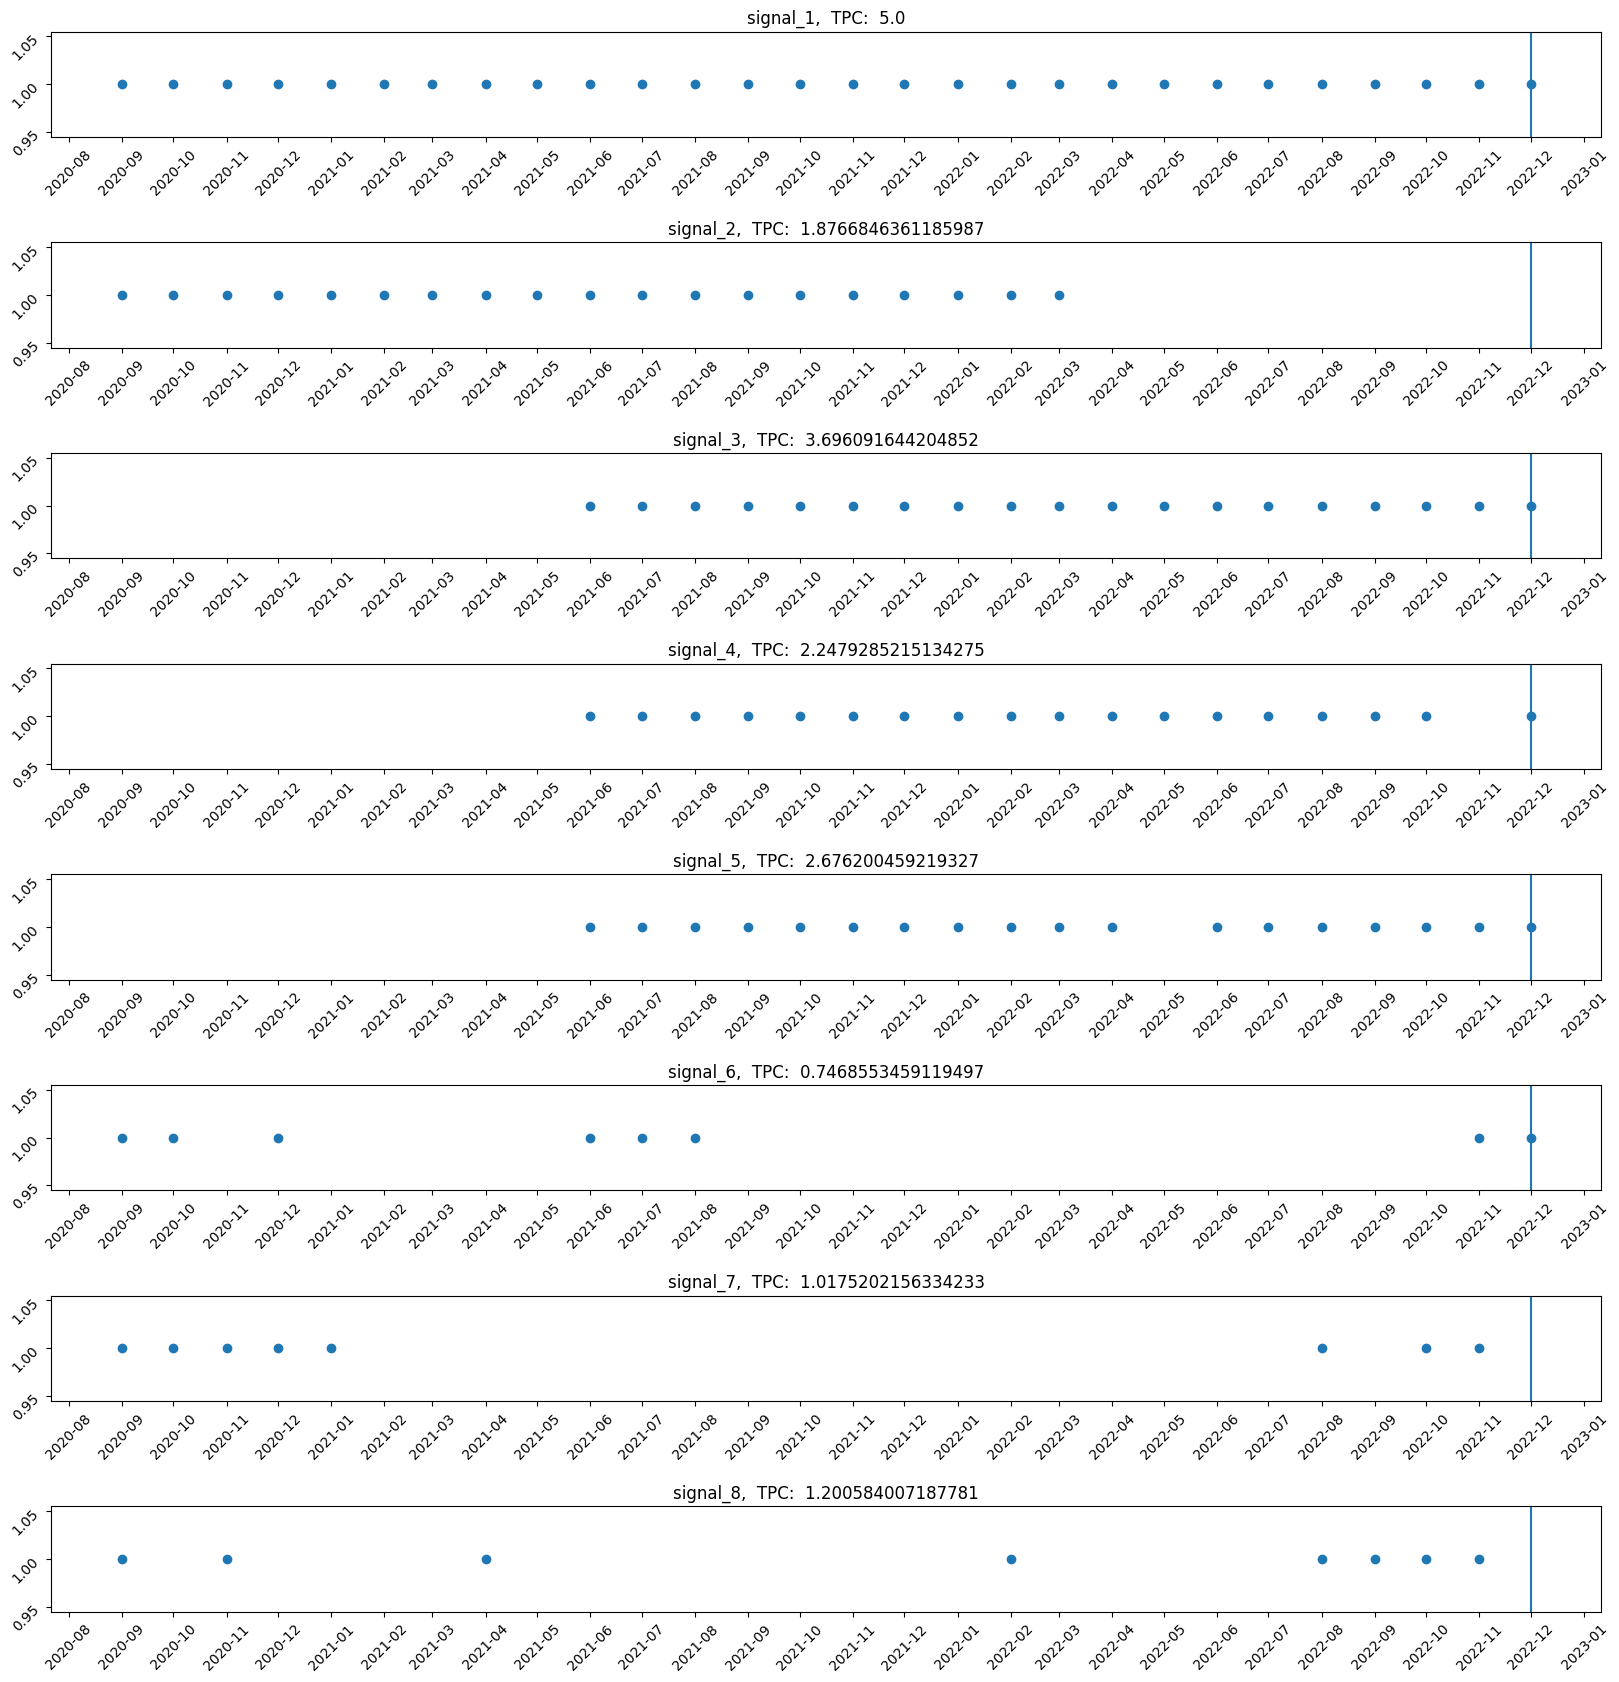

In [21]:
t1 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022" , "12-2022" ]
t2 =  ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "02-2021", "03-2021", "04-2021", "05-2021", "06-2021", "07-2021", "08-2021", "09-2021", "10-2021" , "11-2021", "12-2021" , "01-2022", "02-2022", "03-2022" ]
t3= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022", "11-2022", "12-2022" ]
t4= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","05-2022", "06-2022", "07-2022", "08-2022", "09-2022", "10-2022",  "12-2022" ]
t5= ["06-2021", "07-2021", "08-2021", "09-2021", "10-2021", "11-2021","12-2021", "01-2022", "02-2022", "03-2022", "04-2022","06-2022", "07-2022", "08-2022", "09-2022","10-2022", "11-2022",  "12-2022" ]
t6 = ["09-2020", "10-2020", "12-2020", "06-2021", "07-2021", "08-2021", "11-2022","12-2022"]
t7 = ["09-2020", "10-2020", "11-2020", "12-2020", "01-2021", "08-2022", "10-2022", "11-2022"]
t8 = ["09-2020", "11-2020", "04-2021", "02-2022", "08-2022", "09-2022", "10-2022", "11-2022"]



timestamps= [t1,t2,t3,t4,t5, t6, t7,t8]
names=["signal_1","signal_2","signal_3","signal_4","signal_5","signal_6","signal_7","signal_8"]

all=[]
TPC_scores=[]
for i in range(len(timestamps)):
  data = np.ones(len(timestamps[i]))
  timestamps[i]=pd.to_datetime(timestamps[i] )

  tpcs=TPCS(timestamps[i], MAX_LEN_MONTHS, END_OF_TIME=END_OF_TIME)
  score=tpcs.calculate_TPCS(weights=weights)
  TPC_scores.append(score)
  all.append((timestamps[i],data) )




plt.figure(figsize=(15,3))

f, axarr = plt.subplots(8,1,figsize=(20, 20), sharex=True)

plt.subplots_adjust(top=0.9,hspace=1)

for i in range(len(all)):
  axarr[i].scatter(all[i][0], all[i][1])
  axarr[i].tick_params(labelrotation=45)
  axarr[i].xaxis.set_major_locator(mdates.MonthLocator())
  axarr[i].axvline(dt.datetime(2022, 12, 1))
  axarr[i].title.set_text(names[i]+",  TPC:  "+ str(TPC_scores[i]) )
  axarr[i].tick_params(labelbottom=True)


